# Digit Recognition and Sign Language Detection using Neural Network

### Abstract
<div style="text-align: justify">How to Develop a Convolutional Neural Network From Scratch for MNIST Handwritten Digit Classification and classify sign language for number 0 to 9 using Convolutional Neural Network. The classifier trained is able to correctly determine all the example images and achieves relatively high accuracy of above 90% on the test set. The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning. The describe methods was develpoed based Gregory Cohen's extending MNIST to handwritten letters and Lionel Pigou's Sign Language Recognition Using Convolutional Neural Networks. </div>

### Project Overview
This project is divided into four parts; they are:

1. MNIST Handwritten Digit Classification Dataset
2. Model Evaluation Methodology
3. How to Develop a Baseline Model
4. How to Finalize the Model and Make Predictions

### Development Environment
This project was developed using standalone Keras running on top of TensorFlow with Python 3.

### Digit Recognition
<div style="text-align: justify">The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.
The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively. It is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out test dataset. </div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import sys
import tempfile

from sklearn import  svm, metrics
import tensorflow as tf

<class 'numpy.ndarray'>


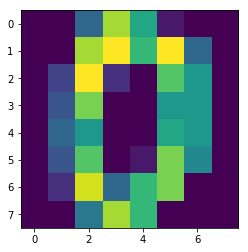

array([[ 0.],
       [ 0.],
       [ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [13.],
       [15.],
       [10.],
       [15.],
       [ 5.],
       [ 0.],
       [ 0.],
       [ 3.],
       [15.],
       [ 2.],
       [ 0.],
       [11.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [12.],
       [ 0.],
       [ 0.],
       [ 8.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 5.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 9.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [11.],
       [ 0.],
       [ 1.],
       [12.],
       [ 7.],
       [ 0.],
       [ 0.],
       [ 2.],
       [14.],
       [ 5.],
       [10.],
       [12.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 6.],
       [13.],
       [10.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [2]:
#what kind of data do we already have?
from sklearn import datasets
digits=datasets.load_digits()

example_image=digits.images[0]
print(type(example_image))
plt.imshow(example_image); plt.show()
example_image.reshape((8*8,1))

### Acquring the dataset

In [3]:
#acquire standard MNIST handwritten digit data
#http://yann.lecun.com/exdb/mnist/

data_dir = '/tmp/tensorflow/mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


### Baseline Model
<div style="text-align: justify">The first step is to develop a baseline model. This is critical as it both involves developing the infrastructure for the test harness so that any model we design can be evaluated on the dataset.
The design of the test harness is modular, and we can develop a separate function for each piece. This allows a given aspect of the test harness to be modified or inter-changed, if we desire, separately from the rest.
We can develop this test harness with five key elements. They are the loading of the dataset, the preparation of the dataset, the definition of the model, the evaluation of the model, and the presentation of results. </div>

### Load Dataset
<div style="text-align: justify">We know some things about the dataset. For example, we know that the images are all pre-aligned (e.g. each image only contains a hand-drawn digit), that the images all have the same square size of 28×28 pixels, and that the images are grayscale. Therefore, we can load the images and reshape the data arrays to have a single color channel. We also know that there are 10 classes and that classes are represented as unique integers.
We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes. We can achieve this with the to_categorical() utility function.</div>

### Examine the data

(55000, 784)


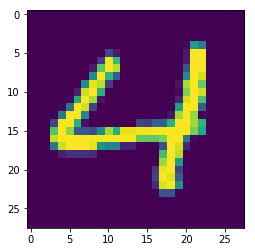

In [6]:
#now we load and examine the data
train_data=mnist.train.images
print(train_data.shape)
n_samples = train_data.shape[0]


train_labels=np.array(np.where(mnist.train.labels==1))[1]

plt.imshow(train_data[1256].reshape((28,28))); plt.show()

###  Create a classifier: a support vector classifier
SVM parameters here:
http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
Train the model- only going to use the training data (and not the test data) to ensure that the model generalizes to unseen cases. This (training) is typically what takes the most computational time when doing machine learning.

In [7]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(train_data, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

###  Now predict the value of the digit on the test data:

In [8]:
test_data=mnist.test.images
test_labels=np.array(np.where(mnist.test.labels==1))[1]

expected = test_labels
predicted = classifier.predict(test_data)

### Displaying the results
<div style="text-align: justify"> In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved. Both precision and recall are therefore based on an understanding and measure of relevance. </div>

See https://en.wikipedia.org/wiki/Precision_and_recall to understand metric definitions
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.94      0.92      0.93      1032
           3       0.92      0.94      0.93      1010
           4       0.92      0.95      0.94       982
           5       0.93      0.90      0.91       892
           6       0.94      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.94      0.91      0.92      1009

   micro avg       0.94      0.94      0.94     10000


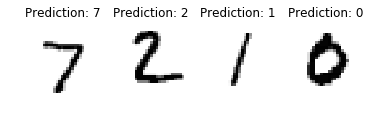

In [9]:
print("See https://en.wikipedia.org/wiki/Precision_and_recall to understand metric definitions")
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(test_data, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image.reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

### Let's test our model on images we draw ourselves!
<div style="text-align: justify">When reading in the data, we are using one-hot-encoding to represent the labels (the actual digit drawn, e.g. “3”) of the images. One-hot-encoding uses a vector of binary values to represent numeric or categorical values. As our labels are for the digits 0-9, the vector contains ten values, one for each possible digit. One of these values is set to 1, to represent the digit at that index of the vector, and the rest are set to 0. For example, the digit 3 is represented using the vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. As the value at index 3 is stored as 1, the vector therefore represents the digit 3.
To represent the actual images themselves, the 28x28 pixels are flattened into a 1D vector which is 784 pixels in size. Each of the 784 pixels making up the image is stored as a value between 0 and 255. This determines the grayscale of the pixel, as our images are presented in black and white only. So a black pixel is represented by 255, and a white pixel by 0, with the various shades of gray somewhere in between.
We can use the mnist variable to find out the size of the dataset we have just imported. </div>

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


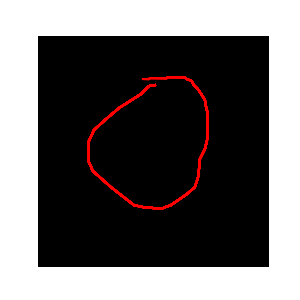

In [2]:
from matplotlib.lines import Line2D
%pylab notebook 
#This is needed for plot widgets

class Annotator(object):
    def __init__(self, axes):
        self.axes = axes

        self.xdata = []
        self.ydata = []
        self.xy    = []
        self.drawon = False

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        if self.drawon:
            self.xdata.append(x)
            self.ydata.append(y)
            self.xy.append((int(x),int(y)))
            line = Line2D(self.xdata,self.ydata)
            line.set_color('r')
            self.axes.add_line(line)

            plt.draw()

    def mouse_release(self, event):
        # Erase x and y data for new line
        self.xdata = []
        self.ydata = []
        self.drawon = False
        
    def mouse_press(self, event):
        self.drawon = True


img = np.zeros((28,28,3),dtype='uint8')

fig, axes = plt.subplots(figsize=(3,3))
axes.imshow(img)
plt.axis("off")
plt.gray()
annotator = Annotator(axes)
plt.connect('motion_notify_event', annotator.mouse_move)
plt.connect('button_release_event', annotator.mouse_release)
plt.connect('button_press_event', annotator.mouse_press)

axes.plot()

plt.show()

Now we see how our model "sees" (predicts the digit from) our hand drawn image. First, we rasterize (convert to pixels) our vector data and process the image to more closely resemble something drawn with a pencil or pressure-sensitive tablet.

In [3]:
digimg = np.zeros((28,28,3),dtype='uint8')
for ind, points in enumerate(annotator.xy[:-1]):
    digimg=cv2.line(digimg, annotator.xy[ind], annotator.xy[ind+1],(255,0,0),1)
digimg = cv2.GaussianBlur(digimg,(5,5),1.0)
digimg = (digimg.astype('float') *1.0/np.amax(digimg)).astype('float')[:,:,0]
digimg **= 0.5; digimg[digimg>0.9]=1.0

#The model is expecting the input in a particular format
testim = digimg.reshape((-1,28*28))

print("Support vector machine prediction:",classifier.predict( testim ))

outimg = testim.reshape((28,28))
figure(figsize=(3,3)); imshow(outimg); 

NameError: name 'cv2' is not defined

<p> Using Tensorflow Softmax Digit Recognition</p>
More info here:
https://www.tensorflow.org/get_started/mnist/beginners   

In [18]:
# Import MNIST data 
data_dir = '/tmp/tensorflow/mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])


cross_entropy = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Model accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))



Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Model accuracy: 0.918


### Testing again on hand drawn images

<IPython.core.display.Javascript object>


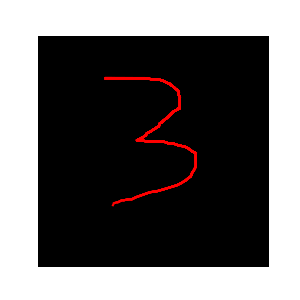

In [19]:
img = np.zeros((28,28,3),dtype='uint8')
fig, axes = plt.subplots(figsize=(3,3))
axes.imshow(img)
plt.axis("off")
plt.gray()
annotator = Annotator(axes)
plt.connect('motion_notify_event', annotator.mouse_move)
plt.connect('button_release_event', annotator.mouse_release)
plt.connect('button_press_event', annotator.mouse_press)
axes.plot()
plt.show()

### Performing rasterize and preprocess and display the rasterize image.

Predicted #: 3


<IPython.core.display.Javascript object>


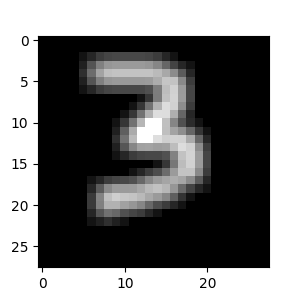

In [20]:
#Rasterize and preprocess
digimg = np.zeros((28,28,3),dtype='uint8')
for ind, points in enumerate(annotator.xy[:-1]):
    digimg=cv2.line(digimg, annotator.xy[ind], annotator.xy[ind+1],(255,0,0),1)
digimg = cv2.GaussianBlur(digimg,(5,5),1.0)
digimg = (digimg.astype('float') *1.0/np.amax(digimg)).astype('float')[:,:,0]
digimg **= 0.5; digimg[digimg>0.9]=1.0
testim = digimg.reshape((-1,28*28))

for tindex in range(10):
    testlab = np.zeros((1,10))
    testlab[0,tindex] = 1
    if sess.run(accuracy, feed_dict={x: testim, y_ : testlab}) == 1:
        break
print("Predicted #:",tindex) #tindex = TF model prediction

#display the rasterized image
outimg = testim.reshape((28,28))
figure(figsize=(3,3)); imshow(outimg)

### Define Model
<div style="text-align: justify">For the convolutional front-end, we can start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. The filter maps can then be flattened to provide features to the classifier.
Given that the problem is a multi-class classification task, we know that we will require an output layer with 10 nodes in order to predict the probability distribution of an image belonging to each of the 10 classes. This will also require the use of a softmax activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with 100 nodes.
All layers will use the ReLU activation function and the He weight initialization scheme, both best practices.
We will use a conservative configuration for the stochastic gradient descent optimizer with a learning rate of 0.01 and a momentum of 0.9. The categorical cross-entropy loss function will be optimized, suitable for multi-class classification, and we will monitor the classification accuracy metric, which is appropriate given we have the same number of examples in each of the 10 classes.</div>
The define_model() function below will define and return this model.
<p>Tensorflow Deep Learning/Convolutional Neural Network Digit recognition</p>
More info here: https://www.tensorflow.org/get_started/mnist/pros

In [21]:
def deepnn(x):
  """deepnn builds the graph for a deep net for classifying digits.
  Args:
    x: an input tensor with the dimensions (N_examples, 784), where 784 is the
    number of pixels in a standard MNIST image.
  Returns:
    A tuple (y, keep_prob). y is a tensor of shape (N_examples, 10), with values
    equal to the logits of classifying the digit into one of 10 classes (the
    digits 0-9). keep_prob is a scalar placeholder for the probability of
    dropout.
  """
  # Reshape to use within a convolutional neural net.
  # Last dimension is for "features" - there is only one here, since images are
  # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
  with tf.name_scope('reshape'):
    x_image = tf.reshape(x, [-1, 28, 28, 1])

  # First convolutional layer - maps one grayscale image to 32 feature maps.
  with tf.name_scope('conv1'):
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

  # Pooling layer - downsamples by 2X.
  with tf.name_scope('pool1'):
    h_pool1 = max_pool_2x2(h_conv1)

  # Second convolutional layer -- maps 32 feature maps to 64.
  with tf.name_scope('conv2'):
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

  # Second pooling layer.
  with tf.name_scope('pool2'):
    h_pool2 = max_pool_2x2(h_conv2)

  # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
  # is down to 7x7x64 feature maps -- maps this to 1024 features.
  with tf.name_scope('fc1'):
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

  # Dropout - controls the complexity of the model, prevents co-adaptation of
  # features.
  with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

  # Map the 1024 features to 10 classes, one for each digit
  with tf.name_scope('fc2'):
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
  return y_conv, keep_prob


def conv2d(x, W):
  """conv2d returns a 2d convolution layer with full stride."""
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
  """max_pool_2x2 downsamples a feature map by 2X."""
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


def weight_variable(shape):
  """weight_variable generates a weight variable of a given shape."""
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)


def bias_variable(shape):
  """bias_variable generates a bias variable of a given shape."""
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

###begin main code

data_dir= '/tmp/tensorflow/mnist/input_data'
# Import data
mnist = input_data.read_data_sets(data_dir, one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

# Build the graph for the deep net
y_conv, keep_prob = deepnn(x)

with tf.name_scope('loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,
                                                        logits=y_conv)
cross_entropy = tf.reduce_mean(cross_entropy)

with tf.name_scope('adam_optimizer'):
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float32)
    accuracy = tf.reduce_mean(correct_prediction)

graph_location = tempfile.mkdtemp()
print('Saving graph to: %s' % graph_location)
train_writer = tf.summary.FileWriter(graph_location)
train_writer.add_graph(tf.get_default_graph())

# Let's run the model
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i % 100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x: batch[0], y_: batch[1], keep_prob: 1.0})
    print('step %d, training accuracy %g' % (i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

# How did we do?
print('test accuracy %g' % accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Saving graph to: /tmp/tmpdr9rhjcj
step 0, training accuracy 0.1
step 100, training accuracy 0.86
step 200, training accuracy 0.92
step 300, training accuracy 0.94
step 400, training accuracy 0.94
step 500, training accuracy 0.92
step 600, training accuracy 0.9
step 700, training accuracy 0.88
step 800, training accuracy 0.92
step 900, training accuracy 0.96
step 1000, training accuracy 0.92
step 1100, training accuracy 0.98
step 1200, training accuracy 0.98
step 1300, training accuracy 0.98
step 1400, training accuracy 0.86
step 1500, training accuracy 0.96
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 0.98
step 1900, training accuracy 0.98
step 2000, training a

### Test on handwritten digits again

In [1]:
img = np.zeros((28,28,3),dtype='uint8')
fig, axes = plt.subplots(figsize=(3,3))
axes.imshow(img)
plt.axis("off")
plt.gray()
annotator = Annotator(axes)
plt.connect('motion_notify_event', annotator.mouse_move)
plt.connect('button_release_event', annotator.mouse_release)
plt.connect('button_press_event', annotator.mouse_press)
axes.plot()
plt.show()

NameError: name 'np' is not defined

Predicted #: 9


<IPython.core.display.Javascript object>


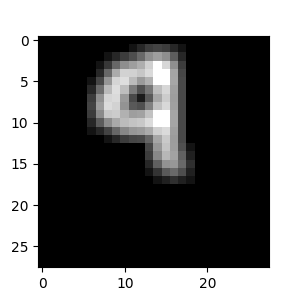

In [49]:
# Rasterize and preprocess the above
digimg = np.zeros((28,28,3),dtype='uint8')
for ind, points in enumerate(annotator.xy[:-1]):
    digimg=cv2.line(digimg, annotator.xy[ind], annotator.xy[ind+1],(255,0,0),1)
digimg = cv2.GaussianBlur(digimg,(5,5),1.0)
digimg = (digimg.astype('float') *1.0/np.amax(digimg)).astype('float')[:,:,0]
digimg **= 0.5; digimg[digimg>0.9]=1.0
testim = digimg.reshape((-1,28*28))

# And run through our model
for tindex in range(10):
    testlab = np.zeros((1,10))
    testlab[0,tindex] = 1
    if accuracy.eval(feed_dict={x: testim, y_: testlab, 
                                keep_prob: 1.0}) == 1:
        break

print("Predicted #:",tindex) #tindex = TF model prediction

# Display our rasterized digit
outimg = testim.reshape((28,28))
figure(figsize=(3,3)); imshow(outimg)

##### From the above we can see the model predicted the digit '9'.

After completing digit recognition I was inspired to build sign language detection based on exsisting methods.  

### Sign Language Detection
First, some background, gesture recognition is an open problem in the area of machine vision, a field of computer science that enables systems to emulate human vision. Gesture recognition has many applications in improving human-computer interaction, and one of them is in the field of Sign Language Translation, wherein a video sequence of symbolic hand gestures is translated into natural language.

A range of advanced methods for the same have been developed. Here, we’ll look at how to perform static-gesture recognition using deep neural network.

I am using the dataset which was created by Turkey Ankara Ayrancı Anadolu High School Students.
https://github.com/ardamavi/Sign-Language-Digits-Dataset

    Details of datasets:
    Image size: 100 x 100 pixels
    Color space: RGB
    Number of classes: 10 (Digits: 0-9)
    Number of participant students: 218
    Number of samples per student: 10

In [2]:
import os, cv2, math
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


### Let's have a look what's inside the dataset

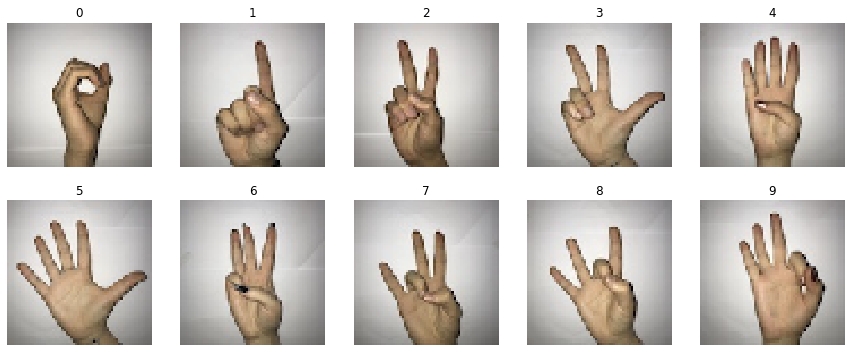

In [15]:
nrow, ncol = 2, 5
plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)
for row in range(nrow):
    for col in range(ncol):
        img_index = row*ncol+col
        # load image
        img = image.load_img('Sign-Language-Digits-Dataset/Examples/example_' + str(img_index) + '.JPG', target_size = (64, 64))
        plt.subplot(nrow, ncol, img_index + 1)
        plt.imshow(img)
        plt.title(img_index)
        plt.axis('off')

This project aims to create a classifier that can intepret sign language for number 0 to 9. The image of the sign language for respective number is shown above.

Inside 'Sign-Language-Digits-Dataset/Dataset/', the images of different sign language are organised according to their labels(i.e. 0 to 9). The dataset will first be divided into 3 sets : training_set, validation_set, and test_set. The size of training set, validation set, and test set are 70%, 15% and 15% of the whole dataset respectively.

To accomodate for the requirement for flow_from_directory method from keras, I will reorganise the images in the following structure :

* Training set : 'Sign-Language-Digits-Dataset/Dataset/training_set/class_00/image_file'
* Validation set : 'Sign-Language-Digits-Dataset/Dataset/validation_set/class_00/image_file'
* Test set : 'Sign-Language-Digits-Dataset/Dataset/test_set/class_00/image_file'

In [16]:
DATASET_PATH = 'Sign-Language-Digits-Dataset/Dataset/'

### Creating a list of filename for training set, validation set, and test set

In [17]:
train_set = {}
validation_set = {}
test_set = {}
for cat in os.listdir(DATASET_PATH):
  cat_dir = os.path.join(DATASET_PATH, cat) # e.g. DATASET_PATH/'0'
  cat_files = os.listdir(cat_dir)
  # Training set's size is 70% of the data
  train_list , test_list = train_test_split(cat_files, test_size = 0.3)
  # Validation set's and Test set's size are both 15% of the data
  validation_list, test_list = train_test_split(test_list, test_size = 0.5)
  train_set[cat] = train_list
  validation_set[cat] = validation_list
  test_set[cat] = test_list

### Train_set

In [18]:
for cat in tqdm(train_set.keys()):
  cat_dir = os.path.join(DATASET_PATH, 'training_set', 'class_0' + str(cat))
  os.makedirs(cat_dir)
  for file in train_set[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(DATASET_PATH, cat, file)
    # dest path is DATASET_PATH/'training_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


### Validation_set

In [19]:
for cat in tqdm(validation_set.keys()):
  cat_dir = os.path.join(DATASET_PATH, 'validation_set', 'class_0' + str(cat))
  os.makedirs(cat_dir)
  for file in validation_set[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(DATASET_PATH, cat, file)
    # dest path is DATASET_PATH/'validation_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 64.05it/s]


### Test_set

In [20]:
for cat in tqdm(test_set.keys()):
  cat_dir = os.path.join(DATASET_PATH, 'test_set', 'class_0' + str(cat))
  os.makedirs(cat_dir)
  for file in test_set[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(DATASET_PATH, cat, file)
    # dest path is DATASET_PATH/'test_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 59.80it/s]


In [21]:
for i in range(10):
  train_size = len(train_set[str(i)])
  validation_size = len(validation_set[str(i)])
  test_size = len(test_set[str(i)])
  print("0{} : Training size({}) Validation size({}) Test size({})".format(i, train_size, validation_size, test_size))

00 : Training size(143) Validation size(31) Test size(31)
01 : Training size(144) Validation size(31) Test size(31)
02 : Training size(144) Validation size(31) Test size(31)
03 : Training size(144) Validation size(31) Test size(31)
04 : Training size(144) Validation size(31) Test size(32)
05 : Training size(144) Validation size(31) Test size(32)
06 : Training size(144) Validation size(31) Test size(32)
07 : Training size(144) Validation size(31) Test size(31)
08 : Training size(145) Validation size(31) Test size(32)
09 : Training size(142) Validation size(31) Test size(31)


Data augmentation is performed on the training set images so that the classifier can learn any changes with respect to scaling, horizontal_flip, or others.

In [22]:
# Performing data augmentation on training dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# For validation dataset, only rescale the pictures
validation_datagen = ImageDataGenerator(rescale = 1./255)

# For test dataset, only rescale the pictures
test_datagen = ImageDataGenerator(rescale = 1./255)

training_data = train_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'training_set'),
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_data = validation_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'validation_set'),
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'test_set'),
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1438 images belonging to 10 classes.
Found 310 images belonging to 10 classes.
Found 314 images belonging to 10 classes.


### CNN
Well Convolutional Neural Network, Convnet has become famous among recent times. Convnet is part of deep, feed-forward artificial neural networks that can perform a variety of task with even better time and accuracy than other classifiers. 
<div style="text-align: justify">A convolutional neural network (CNN) is quite similar to amultilayered neural network. A standard CNN consist of oneor  more  convolutional  layers  followed  by  one  or  more  fullyconnected  layers.  A  CNN  is  designed  to  take  advantage  ofan  input  signal  having  a  2D  structure  such  as  images.  Themost  important  step  to  train  and  create  a  CNN  is  to  definethe  network  architecture.  We  generally  customize  the  CNNarchitecture  depending  on  the  type  of  input  and  the  desiredoutput  goal.  The  output  layer  of  a  CNN  can  be  customizedas  a  classification  layer  or  a  regression  layer  based  on  thedesired output. For our problem since we need to classify theobjects,  we  design  a  CNN  with  the  Classification  layer.  TheCNN structure used for our problem is described in figure below. </div>

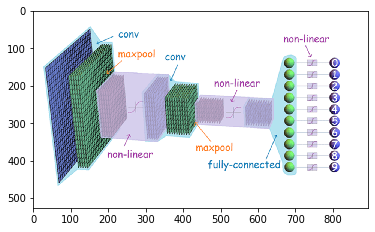

In [3]:
cnn = mpimg.imread('cnn.png')
plt.imshow(cnn)

As we can observe, like any other CNN our model consists couple of Conv2D and MaxPooling layers followed by some fully connected layers (Dense).
The first Conv2D (Convolutional) layer takes input image of shape (64,64,3). The last fully connected layer gives us output for 10 signs.
We are using a Dropout after 2nd Conv2D layer to regularise our training.
We are using softmax activation function in the final layer. Which will give us probablity for each aplabet as an output.

In [23]:
# Initialising the CNN
classifier = Sequential()

# Adding first convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding second convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding third convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Train the data with training set, and check the result with validation accuracy

In [24]:
history = classifier.fit_generator(training_data,
                         steps_per_epoch = math.ceil(training_data.n / training_data.batch_size),
                         epochs = 100,
                         validation_data = validation_data,
                         validation_steps = math.ceil(validation_data.n / validation_data.batch_size))

Epoch 1/100
45/45 [==============================] - 9s 200ms/step - loss: 2.3144 - accuracy: 0.1092 - val_loss: 2.3031 - val_accuracy: 0.1387
Epoch 2/100
45/45 [==============================] - 5s 104ms/step - loss: 2.2967 - accuracy: 0.1384 - val_loss: 2.2910 - val_accuracy: 0.2387
Epoch 3/100
45/45 [==============================] - 5s 113ms/step - loss: 2.0285 - accuracy: 0.2942 - val_loss: 1.7236 - val_accuracy: 0.4677
Epoch 4/100
45/45 [==============================] - 5s 114ms/step - loss: 1.5189 - accuracy: 0.4729 - val_loss: 1.0302 - val_accuracy: 0.6161
Epoch 5/100
45/45 [==============================] - 5s 111ms/step - loss: 1.1855 - accuracy: 0.5897 - val_loss: 0.8330 - val_accuracy: 0.6387
Epoch 6/100
45/45 [==============================] - 5s 114ms/step - loss: 1.0470 - accuracy: 0.6558 - val_loss: 0.7313 - val_accuracy: 0.7355
Epoch 7/100
45/45 [==============================] - 5s 107ms/step - loss: 0.9046 - accuracy: 0.7038 - val_loss: 0.5004 - val_accuracy: 0.8129

Epoch 58/100
45/45 [==============================] - 5s 112ms/step - loss: 0.0859 - accuracy: 0.9694 - val_loss: 0.0154 - val_accuracy: 0.9839
Epoch 59/100
45/45 [==============================] - 5s 116ms/step - loss: 0.1124 - accuracy: 0.9569 - val_loss: 0.0028 - val_accuracy: 0.9742
Epoch 60/100
45/45 [==============================] - 5s 117ms/step - loss: 0.0919 - accuracy: 0.9701 - val_loss: 0.0695 - val_accuracy: 0.9774
Epoch 61/100
45/45 [==============================] - 5s 120ms/step - loss: 0.1016 - accuracy: 0.9701 - val_loss: 0.4060 - val_accuracy: 0.9839
Epoch 62/100
45/45 [==============================] - 6s 123ms/step - loss: 0.0743 - accuracy: 0.9764 - val_loss: 0.0016 - val_accuracy: 0.9839
Epoch 63/100
45/45 [==============================] - 6s 124ms/step - loss: 0.0772 - accuracy: 0.9708 - val_loss: 0.0807 - val_accuracy: 0.9839
Epoch 64/100
45/45 [==============================] - 6s 125ms/step - loss: 0.0534 - accuracy: 0.9833 - val_loss: 0.0013 - val_accuracy:

### Model accuracy
I was getting an error compiling the tranining and validation graph on jupyter notebook, but was getting no error on spyder. So I saved the graph and preloaded to jupyter.

In [4]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])

NameError: name 'history' is not defined

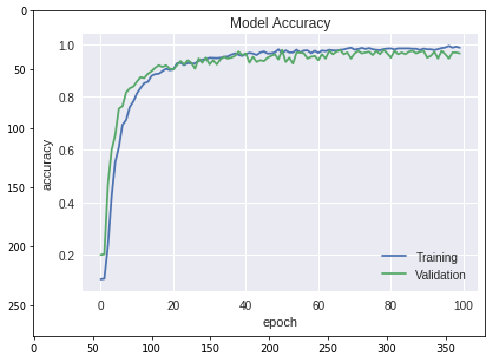

In [25]:
accuracy = mpimg.imread('accuracy.png')
plt.imshow(accuracy)

### Accuracy of the classifier when evaluated based on the test_set

In [26]:
test_loss, test_accuracy = classifier.evaluate_generator(test_data, math.ceil(test_data.n / test_data.batch_size))
print("Accuracy on test set : {}".format(test_accuracy))

Accuracy on test set : 0.9617834687232971


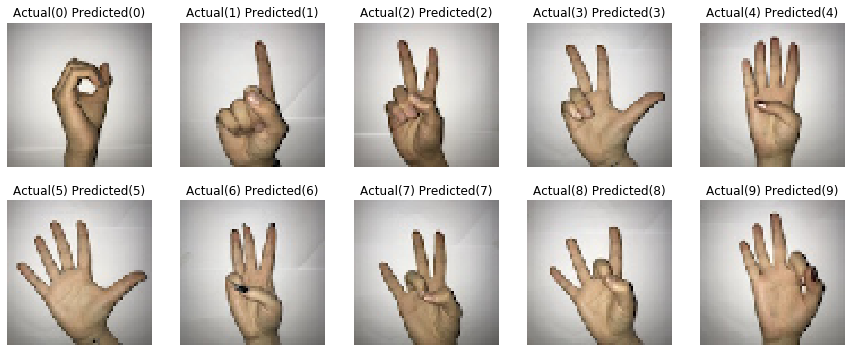

In [27]:
nrow, ncol = 2, 5
plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)
for row in range(nrow):
    for col in range(ncol):
        img_index = row*ncol+col
        # load image
        img = image.load_img('Sign-Language-Digits-Dataset/Examples/example_' + str(img_index) + '.JPG', target_size = (64, 64))
        # convert image into array for prediction
        test_image = image.img_to_array(img)
        test_image = np.expand_dims(test_image, axis = 0)
        # predict image using classifier
        result = classifier.predict(test_image).argmax()
        plt.subplot(nrow, ncol, img_index + 1)
        plt.imshow(img)
        plt.title("Actual({}) Predicted({})".format(img_index, result))
        plt.axis('off')

It can be seen from above output that the classifier is able to classify all the images correctly. 

##### The project has been done based on the exsisting methods found the papers.  Some parts of the code has been directly taken from the paper due to lack of skill. All models mentioned above was developed for learning purpose only, the authors mentioned on the reference reserve the full credit. 

# Reference

[1] Pigou, L., Dieleman, S., Kindermans, P.J. and Schrauwen, B., 2014, September. Sign language recognition using convolutional neural networks. In European Conference on Computer Vision (pp. 572-578). Springer, Cham.

[2] G. Cohen, S. Afshar, J. Tapson and A. van Schaik, "EMNIST: Extending MNIST to handwritten letters," 2017 International Joint Conference on Neural Networks (IJCNN), Anchorage, AK, 2017, pp. 2921-2926, doi: 10.1109/IJCNN.2017.7966217.

* https://github.com/ardamavi/Sign-Language-Digits-Dataset
* https://www.superdatascience.com/deep-learning/